# Analyzing Segmentador data
Gabriel Emilio Herrera Oropeza <br>
13/06/2022

## *INSTRUCTIONS TO DEVELOPERS*

**Make sure to fetch and pull the most updated code and run `pip install .` before using the jupyter notebooks. Codes are constantly being improved and the workflow below work best with the newest version.**

This document describes the workflow to analyze data from segmented images that were previously processed by `insert tool name`. We will show how to import, visualise, filter and cluster the data using robust, simple-to-use functions. Many of these functions take up positional arguments that can be modified. To display the usage of these functions, run `help(name_of_function)`.

We begin by importing the `tool name` module.

In [1]:
from ngtools.analyzer import Analyzor

## Create Analyzor object class

We provide an Analyzor object class that facilitates storage of nuclei segmented data and its downstream processing. To construct this object, we can easily pass the path to Segmentador output directory to `Analyzor` class function:

In [2]:
path_to_experiments = "/Users/m./Dropbox (CDN Team)/Somia"
obj = Analyzor(path_to_experiments, pattern="output*.csv", collated_csv=None)

### Preview data

You may extract information from the Analyzor object in many ways. Below are some useful functions:

In [6]:
# print out number of cells
obj.ncells()

# print out features from Segmentador
obj.features()

# preview data
obj.showData()
#obj.showData(vars = ["cellID", "avg_intensity_dapi", "experiment"])

cellID  avg_intensity_dapi  nuclear_area  nuclear_perimeter  major_axis  \
0          5                1100           239                 60        21.6   
1          6                1404            92                 42        17.0   
2          7                1301           130                 45        17.0   
3          8                 893           171                 50        18.2   
4          9                 744           211                 56        20.5   
...      ...                 ...           ...                ...         ...   
6205      92                 468            20                 17         6.7   
6206      93                 921           156                 47        16.2   
6207      94                 520             3                  7         2.8   
6208      96                 900            77                 34        12.6   
6209      97                 495             8                 10         3.2   

      minor_axis  axes_ratio  circularity  eccentricity  solidity  ...  \
0           14.2       0.655        0.847         0.755     0.982  ...   
1            7.0       0.409        0.668         0.912     0.965  ...   
2            9.7       0.573        0.815         0.819     0.977  ...   
3           12.0       0.661        0.844         0.751     0.978  ...   
4           13.1       0.637        0.855         0.771     0.985  ...   
...          ...         ...          ...           ...       ...  ...   
6205         3.8       0.570        0.862         0.821     0.958  ...   
6206        12.5       0.771        0.885         0.637     0.986  ...   
6207         1.4       0.491        0.883         0.871     0.937  ...   
6208         7.9       0.626        0.819         0.780     0.978  ...   
6209         3.0       0.936        1.028         0.353     0.967  ...   

      gfap_x_actin_x_laminB1  dna_peaks  dna_dots dna_dots_size_median  \
0                  517338864         21        16                1.288   
1                 1003488972          9        10                1.211   
2                  918282420         12        10                0.799   
3                  666705600         16        15                1.237   
4                  627093300         23        23                0.928   
...                      ...        ...       ...                  ...   
6205                18015072          2         1                1.134   
6206               522356023         10         7                0.824   
6207                37704576          1         0                0.000   
6208               411716149          7         4                1.520   
6209                80041920          1         0                0.000   

      spatial_entropy  gfap_group  actin_group  laminB1_group  \
0               3.730           0            1              3   
1               3.890           0            1              4   
2               3.841           0            1              4   
3               3.881           0            0              4   
4               3.903           0            1              3   
...               ...         ...          ...            ...   
6205            3.937           0            1              0   
6206            3.673           1            1              4   
6207            4.043           0            1              0   
6208            3.772           1            2              3   
6209            3.985           1            3              1   

             experiment                                           path2ong  
0           D3 GFAPLbPh  /Users/m./Dropbox (CDN Team)/Somia/D3 GFAPLbPh...  
1           D3 GFAPLbPh  /Users/m./Dropbox (CDN Team)/Somia/D3 GFAPLbPh...  
2           D3 GFAPLbPh  /Users/m./Dropbox (CDN Team)/Somia/D3 GFAPLbPh...  
3           D3 GFAPLbPh  /Users/m./Dropbox (CDN Team)/Somia/D3 GFAPLbPh...  
4           D3 GFAPLbPh  /Users/m./Dropbox (CDN Team)/Somia/D3 GFAPLbPh...  
...         

### Plot data

Data from Analyzor object can be visualised using scatterplot, violinplot or lineplot. For example, to plot a scatterplot of `nuclear_area` against `avg_intensity_dapi`, you can run:

In [7]:
help(obj.plotData)

Help on method plotData in module ngtools.analyzer:

plotData(x, y, data_type='norm', plot_type='scatter', hue=None, alpha=1, x_trans=None, y_trans=None, x_rot=None, shuffle=False, filter=None) method of ngtools.analyzer.Analyzor instance
    Plot data from Analyzer object
    
    Parameters
    ----------
    x : string
        Name of feature to plot on the x-axis
    y : string
        Name of feature  to plot on the y-axis
    data_type : string
        Type of data to plot. Can be 'raw' (default) or 'norm'.
    plot_type : string
        Type of plot. Can be "scatter" (default), "violin" or "line"
    hue : string
        Name of feature to colour-code the cells by
    alpha : float
        Set opacity of scatter points. Input can take up a float value from 0 to 1.
    x_trans : string
        Scaling type to apply on x-axis. Can be "linear", "log", "symlog" or "logit"
    y_trans : bool
        Scaling type to apply on x-axis. Can be "linear", "log", "symlog" or "logit"
    x_ro

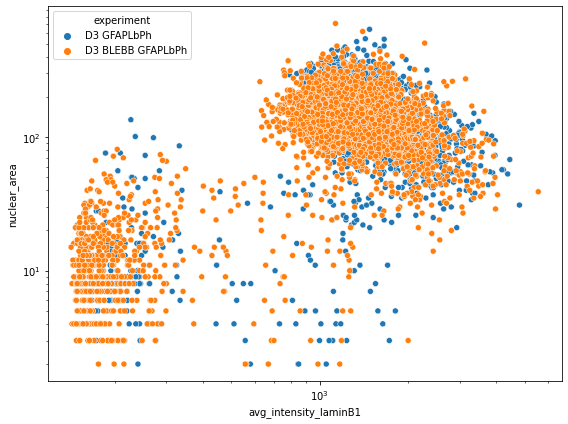

In [4]:
obj.plotData(x = "avg_intensity_laminB1", y = "nuclear_area",
            plot_type = "scatter", hue = "experiment",
            x_trans = "log", y_trans = "log")

You may color cells by any categorical variable in your data by providing a feature name to the `hue` parameter. The x- and y-axis can be transformed and the order of the cells can be shuffled. Run `help(obj.plotData)` for a guide.

### Show cell images

The Analyzor object holds the path to the image of each cells and has the ability to display this image.
Simply run the `showCell` function:


Enter number of nuclei to show (any integer OR "all"): 5

Showing 5 cells of a total of 6210 in the selected data
Input channel for red [dapi/actin/laminB1/gfap/none] laminB1
Input channel for green [dapi/actin/laminB1/gfap/none] gfap
Input channel for blue [dapi/actin/laminB1/gfap/none] none


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 61.57it/s]


{'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}
{'D3 GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}, 'D3 BLEBB GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}}
{'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}
{'D3 GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}, 'D3 BLEBB GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}}
{'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}
{'D3 GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}, 'D3 BLEBB GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}}
{'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}
{'D3 GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}, 'D3 BLEBB GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}}
{'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}
{'D3 GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}, 'D3 BLEBB GFAPLbPh': {'dapi': 0, 'gfap': 1, 'actin': 2, 'laminB1': 3}}


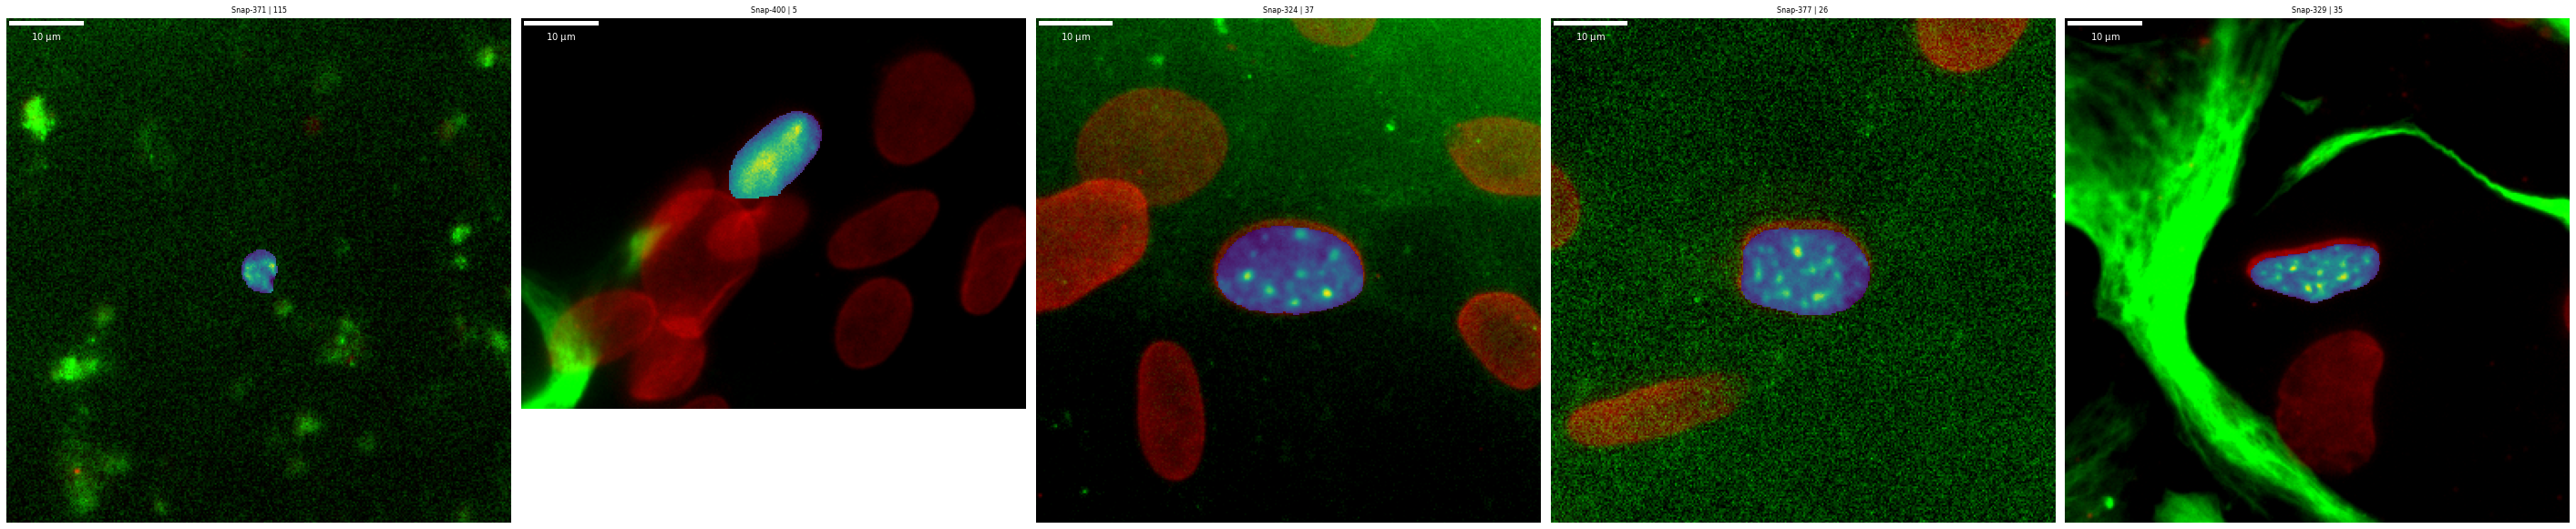

In [5]:
obj.showCells(fig_height = 30)

Running the above function without any input parameters will invoke an interactive prompt. Alternatiely, you may provide the number of cells and channels to display as such:


Showing 10 cells of a total of 1445 in the selected data


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 58.16it/s]


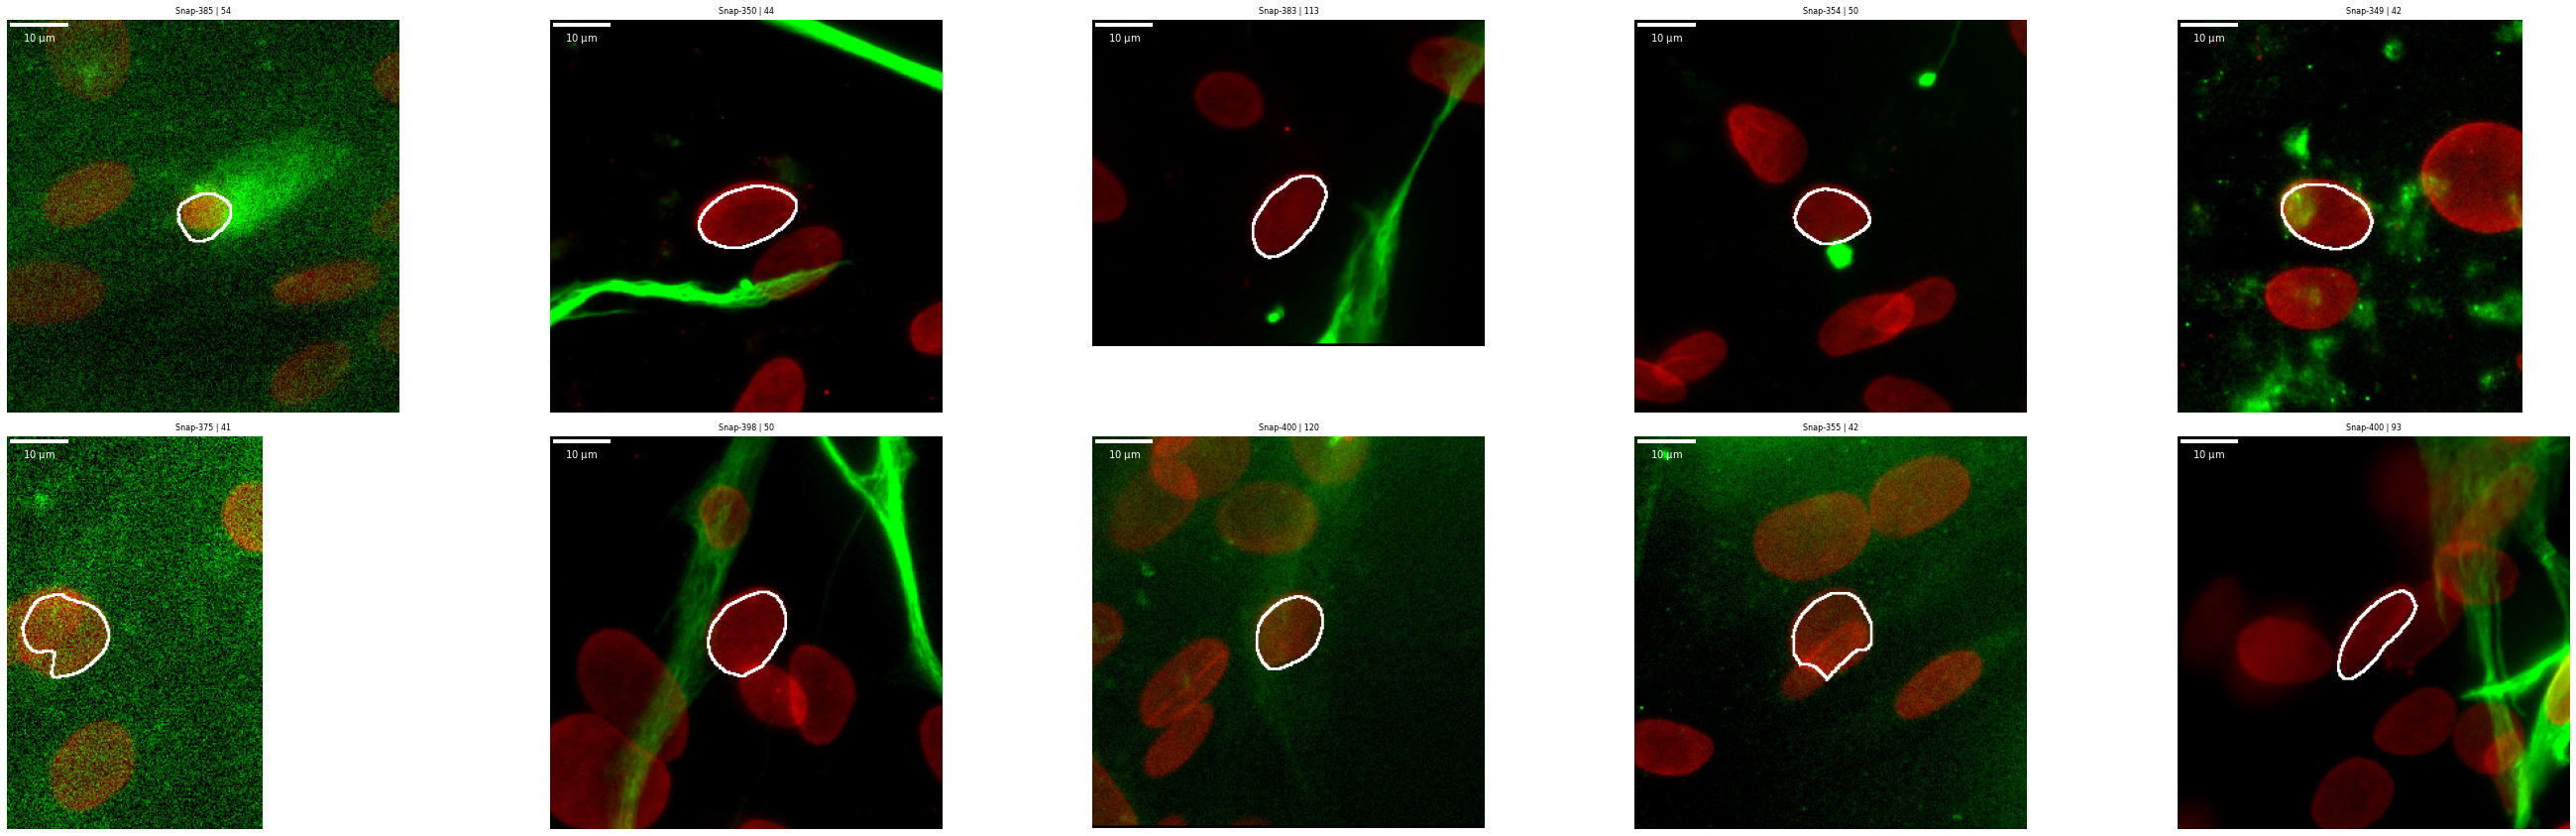

In [3]:
obj.showCells(n=10, ch2show = {'red': "laminB1", 'green': "gfap"}, 
              order_by = "avg_intensity_laminB1", ascending = True, 
             filter = "laminB1_group == 4", show_nucleus = False)

To maximise the use of RGB channels, `showCell` will show the DAPI/nucleus as a separate layer by default. This can be switched off using the `show_nucleus` flag:

In [ ]:
obj.showCells(n=5, ch2show = {'red': "rfp", 'green': "beta3"}, show_nucleus = False)

## Data preprocessing

### Center DAPI intensity

In [6]:
help(obj.ctrDAPI)

Help on method ctrDAPI in module ngtools.analyzer:

ctrDAPI(splitBy='experiment', nbins=100, showPlot=True) method of ngtools.analyzer.Analyzor instance
    Centralize DAPI intensity ....
    
    Parameters
    ----------
    splitBy : string
        Name of feature to
    nbins : int
        Number of bins...
    showPlot : bool
        Whether to display....
    
    Returns
    -------
    None.



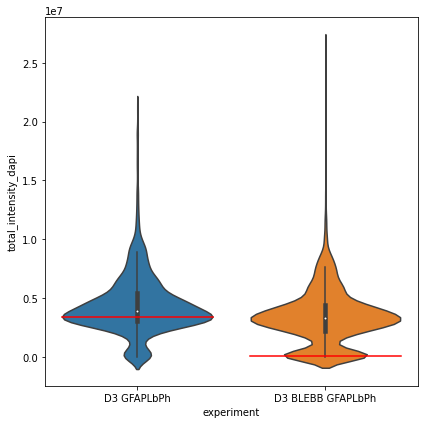

In [23]:
obj.ctrDAPI(nbins=100)

### Identify Single Cells
Identify single cells based on DNA marker content. (Here we have to give the option to select the range of the spread we want to have from sum of DAPI intensity. You can see blebb and no Blebb have different spreading.

In [24]:
obj.findSingleCells(byExperiment = True, nbins = 100, spread = 0.4, channel = None)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 174.21it/s]


### Normalize channel intensities. We should see how it looks like as in DAPI intensity.

In [27]:
obj.normIntensity(method = "mode", nbins = 100)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 104.57it/s]


In [29]:
help(obj.plotVarDist)

Help on method plotVarDist in module ngtools.analyzer:

plotVarDist(vars='all', data_type='norm') method of ngtools.analyzer.Analyzor instance
    Plot distribution of features
    
    Parameters
    ----------
    vars : string or stringlist
        Name of features to plot
    data_type : string
        Whether to plot "raw" data or "norm" data
    
    Returns
    -------
    None.



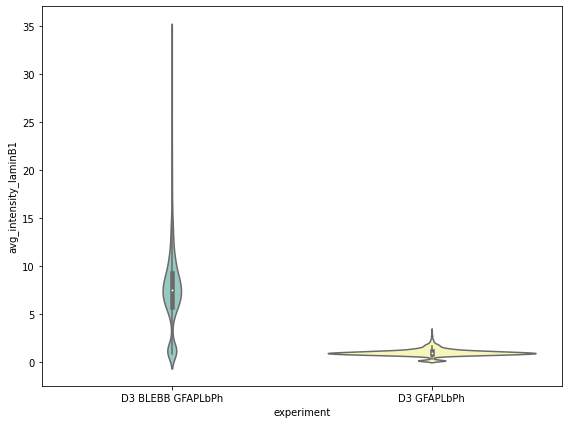

In [34]:
obj.plotData(x = "experiment", y = "avg_intensity_laminB1", plot_type = "violin")

**TO DO**: Order_by feature

### Filter cells

In [36]:
# Keep only single cells
obj.filterCells(filter = "isSingleCell == True", inplace = True)

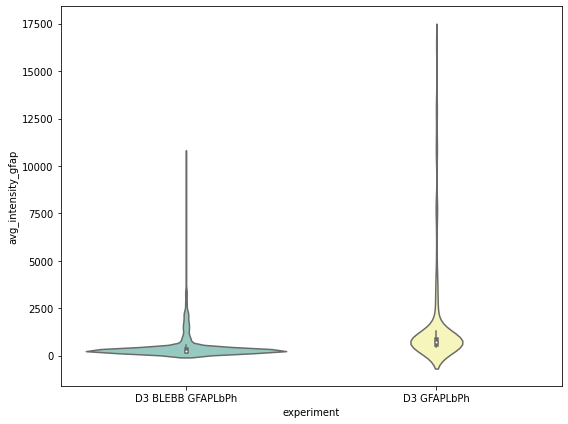

In [40]:
obj.plotData(x = "experiment", y = "avg_intensity_gfap", plot_type = "violin")

In [44]:
obj.count(["laminB1_group","gfap_group"])

laminB1_group  gfap_group
3              1             404
               0             290
0              0             197
4              1             183
2              1             177
               0             150
4              0             117
               3              30
3              2              27
4              2              22
0              1              22
5              1              22
1              1              22
2              2              21
1              0              20
3              3              19
4              4              14
2              3              10
5              2               9
               3               6
               4               5
1              2               4
0              2               4
5              5               4
4              5               3
3              4               2
2              4               2
1              3               1
5              0               1
dtype: int64

In [42]:
%matplotlib tk
chosen_cells = obj.chooseCells("laminB1_group", "gfap_group")

In [43]:
%matplotlib inline

In [45]:
obj.filterCells(cells = chosen_cells)

In [47]:
obj.count(["laminB1_group","gfap_group"])

laminB1_group  gfap_group
4              3             30
3              2             27
4              2             22
3              3             19
4              4             14
5              2              9
               3              6
               4              5
               5              4
4              5              3
3              4              2
dtype: int64

## Dimensional reduction and clustering

### Prepare matrix

Below are the nuclear features used for dimensional reduction

In [48]:
obj.showADataVars()


['avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter', 'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity', 'solidity', 'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi', 'avg_intensity_external_ring_dapi', 'total_intensity_core_dapi', 'total_intensity_internal_ring_dapi', 'total_intensity_external_ring_dapi', 'total_intensity_dapi', 'avg_intensity_gfap', 'total_intensity_gfap', 'avg_intensity_actin', 'total_intensity_actin', 'avg_intensity_laminB1', 'total_intensity_laminB1', 'gfap_x_actin', 'gfap_x_laminB1', 'actin_x_laminB1', 'gfap_x_actin_x_laminB1', 'dna_peaks', 'dna_dots', 'dna_dots_size_median', 'spatial_entropy']


In [49]:
exclude_feat = ['total_intensity_laminB1', 'gfap_x_actin', 'gfap_x_laminB1', 'actin_x_laminB1', 'gfap_x_actin_x_laminB1',
               'total_intensity_gfap', 'total_intensity_actin','total_intensity_dapi', 'total_intensity_core_dapi', 
                'total_intensity_internal_ring_dapi', 'total_intensity_external_ring_dapi']
obj.excludeVars(vars = exclude_feat)
obj.showADataVars()

['avg_intensity_dapi', 'nuclear_area', 'nuclear_perimeter', 'major_axis', 'minor_axis', 'axes_ratio', 'circularity', 'eccentricity', 'solidity', 'avg_intensity_core_dapi', 'avg_intensity_internal_ring_dapi', 'avg_intensity_external_ring_dapi', 'avg_intensity_gfap', 'avg_intensity_actin', 'avg_intensity_laminB1', 'dna_peaks', 'dna_dots', 'dna_dots_size_median', 'spatial_entropy']


In [ ]:
## This graphic should be before

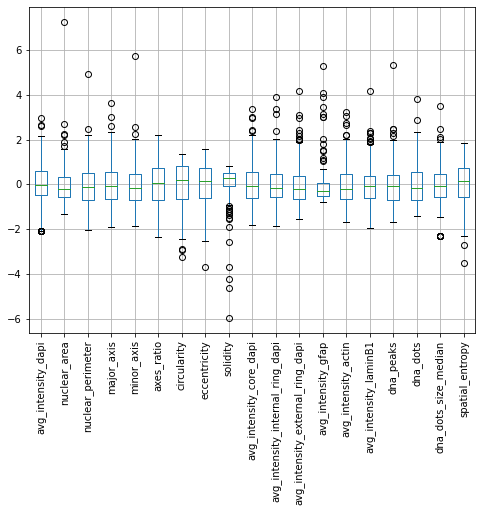

In [50]:
obj.plotVarDist(vars = "all", data_type="scaled")

In [ ]:
# optional rescaling
obj.normAData(method = "maxabsscaler")

### Cluster and dim reduction

In [51]:
obj.findNeighbours(method = "umap")
obj.findClusters(method = "leiden", res=0.6)
obj.runDimReduc(method = "umap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


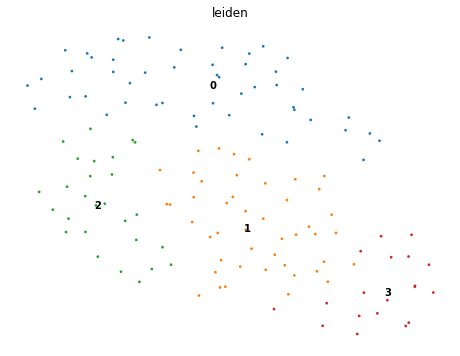

In [52]:
# Plot UMAP showing features
obj.plotDim(hue = "leiden", method="umap")

In [ ]:
obj.plotDim(hue = "avg_intensity_rfp", method="umap")

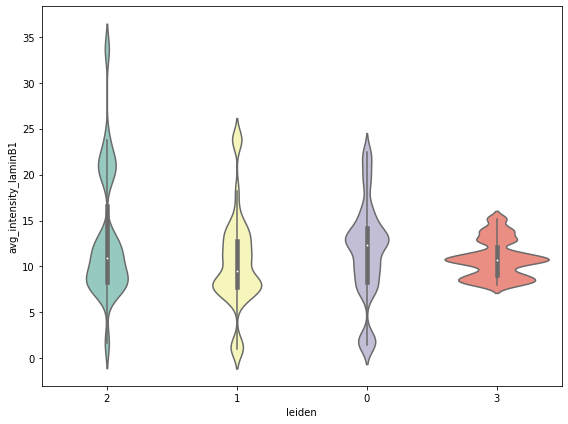

In [53]:
obj.plotData(x="leiden", y = "avg_intensity_laminB1", plot_type = "violin")

In [ ]:
obj.showCell(RGB_contrasts=[4,3,4], n=5, ch2show={'red':'laminB1', 'green':'gfap'}, filter = "leiden == '0'")

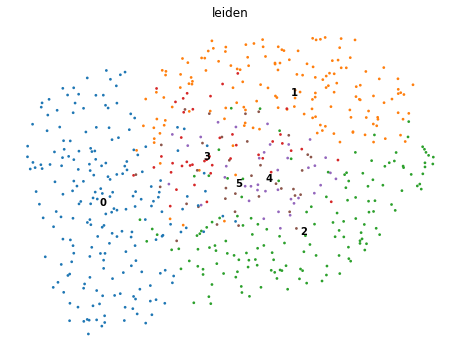

In [27]:
# Plot UMAP showing features
obj.plotDim(hue = "leiden", method="umap")

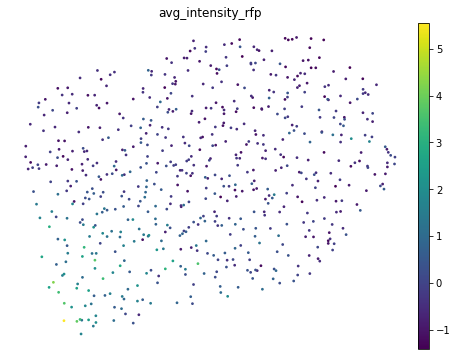

In [28]:
obj.plotDim(hue = "avg_intensity_rfp", method="umap")

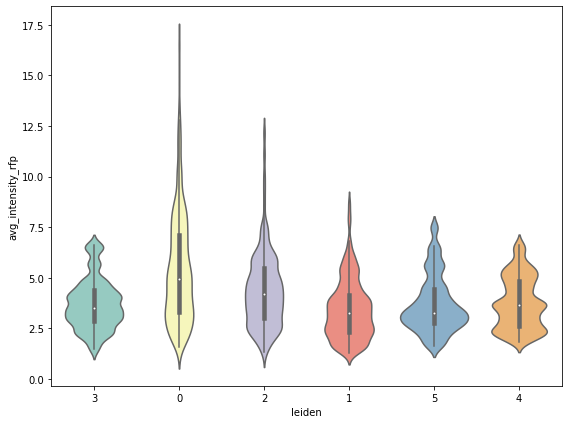

In [29]:
obj.plotData(x="leiden", y = "avg_intensity_rfp", plot_type = "violin")

In [31]:
obj.showCell(RGB_contrasts=[4,3,4], n=5, ch2show={'red':'rfp', 'green':'beta3'}, filter = "leiden == '0'")

AttributeError: 'Analyzor' object has no attribute 'showCell'

#### DIFFMAP

In [56]:
obj.findNeighbours(method = "umap")
obj.findClusters(method = "leiden")
obj.runDimReduc(method = "diffmap")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          0.87911165  0.77370566  0.7539496   0.6474474   0.6195129
      0.6081877   0.5563282   0.53572553  0.4711883   0.4456358   0.43125588
      0.40283465  0.35780644 -0.36605194]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


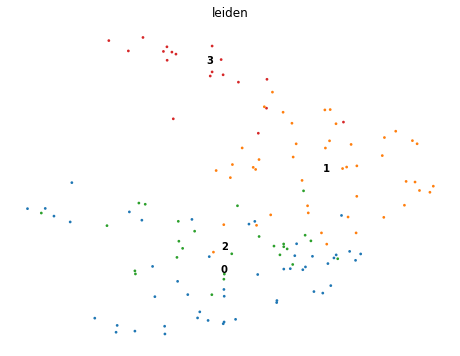

In [57]:
obj.plotDim(hue = "leiden", method="diffmap")

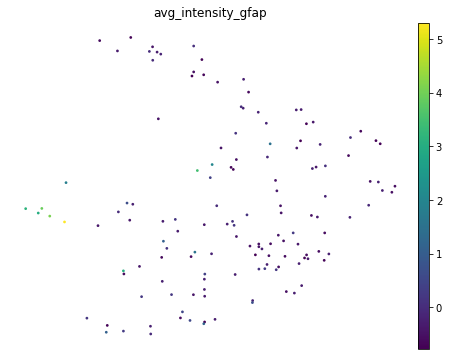

In [58]:
obj.plotDim(hue = "avg_intensity_gfap", method="diffmap")

#### Pseudotime
Choose a root cell for diffusion pseudotime:

In [59]:
%matplotlib tk
root_cells = obj.chooseCells(reduction = "diffmap")

In [ ]:
%matplotlib inline

In [60]:
obj.runPT(root_cells = root_cells)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [61]:
obj.plotDim(hue = "dpt_pseudotime", method="diffmap")

#### Stacked violin plot

In [ ]:
fig, ax = plt.subplots(figsize = (5, 7))
sc.pl.stacked_violin(adata, data_cols, groupby = 'experiment', swap_axes = True, ax = ax, dendrogram = True)
fig.tight_layout()
plt.show()

#### Pseudotime - heatmap

In [ ]:
# Enter order of clusters in pseudotime
pseudotime_path = [3,4,7]

In [ ]:
# Heatmap - pseudotime
sc.pl.paga_path(
    adata, 
    pseudotime_path, 
    data_cols,
    show_node_names = True,
    n_avg = 50,
    annotations = ['dpt_pseudotime'],
    show_colorbar = True,
    color_map = 'coolwarm',
    groups_key = 'leiden',
    color_maps_annotations = {'dpt_pseudotime': 'viridis'},
    title = 'Path',
    return_data = False,
    normalize_to_zero_one = True,
    show = True
)

### Save Object